In [170]:
      # Importing the Libraries
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, mean_squared_error, confusion_matrix

LOADING PROCESSED DATASET

In [171]:
# Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/nhanna1219/Closely_Customer_Classification/main/Preprocessed_Data.csv")
print("Number of datapoints:", len(df))
df

Number of datapoints: 2213


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Loyalty_Score,Is_Loyal
0,5.368107,-1.804778,-1.078759,-0.646435,-3.097021,0.337949,0.007753,0.821314,-0.411286,0.355576,...,0.493904,0.814431,-0.774570,0.656888,0.502650,0.688828,-1.420569,0.749187,0.405501,True
1,-3.491633,0.502507,-0.427520,-0.183056,0.859958,-0.916708,2.148626,0.386522,-0.610815,1.025348,...,0.453972,-0.146679,0.185969,0.007899,-0.298426,-0.227511,-0.257056,0.167572,0.190314,False
2,2.018019,-1.291695,-1.182698,-1.128659,0.603602,-0.583301,-0.137928,-0.128718,-0.429963,0.473263,...,-1.240771,0.170181,-0.554964,-0.661380,0.382996,0.297692,0.214487,-0.410894,0.380150,True
3,-3.286131,0.555640,-0.593547,-0.890906,0.937647,0.370995,-0.325239,0.343596,-0.994986,-0.007917,...,-0.242170,0.251216,-0.071301,-0.027513,0.068979,0.056725,-0.360599,-0.198887,0.234560,False
4,-0.585539,-1.463671,0.526403,2.031741,0.218226,0.454320,-0.106105,-0.749205,0.098400,-0.308995,...,0.156086,0.973668,-0.445877,0.238192,0.781415,-0.038416,-0.242535,-0.114447,0.161950,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,2.517975,-2.138862,0.597105,-0.261319,0.287117,1.454556,-0.230066,1.349763,-0.798941,-1.439629,...,-0.675726,-1.440310,2.208240,0.187841,0.570606,0.674402,-0.863495,1.857402,0.368651,True
2209,-0.572000,0.107693,4.763979,0.798368,2.439081,0.086973,1.652409,-0.748219,0.592506,0.188656,...,-1.750092,2.701776,0.344741,-0.852533,-1.063754,0.413758,-0.767434,-0.096628,0.339637,True
2210,3.194354,1.378330,-0.705485,2.333412,-0.950679,-2.835620,-0.437002,0.709056,-0.728011,-0.501088,...,-0.640887,-1.276895,-1.341454,1.680951,-0.511617,0.604994,-0.196879,-1.370490,0.313276,True
2211,1.566489,-1.799049,0.414109,-1.856258,2.165313,-0.543326,0.460617,-0.247051,0.794085,-0.773861,...,-0.064015,-0.008221,0.129935,-0.087201,0.015821,0.195594,0.120479,-0.189465,0.443615,True


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PC1            2213 non-null   float64
 1   PC2            2213 non-null   float64
 2   PC3            2213 non-null   float64
 3   PC4            2213 non-null   float64
 4   PC5            2213 non-null   float64
 5   PC6            2213 non-null   float64
 6   PC7            2213 non-null   float64
 7   PC8            2213 non-null   float64
 8   PC9            2213 non-null   float64
 9   PC10           2213 non-null   float64
 10  PC11           2213 non-null   float64
 11  PC12           2213 non-null   float64
 12  PC13           2213 non-null   float64
 13  PC14           2213 non-null   float64
 14  PC15           2213 non-null   float64
 15  PC16           2213 non-null   float64
 16  PC17           2213 non-null   float64
 17  PC18           2213 non-null   float64
 18  PC19    

In [173]:
X = df.iloc[:, :21]
y = df['Is_Loyal']

8-1-1

In [174]:
# Chia dữ liệu thành tập huấn luyện, tập validation và tập test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# In ra số lượng dòng của từng tập
print(f"Số lượng dòng tập huấn luyện: {len(X_train)}")
print(f"Số lượng dòng tập validation: {len(X_validate)}")
print(f"Số lượng dòng tập test: {len(X_test)}")


Số lượng dòng tập huấn luyện: 1770
Số lượng dòng tập validation: 221
Số lượng dòng tập test: 222


In [175]:
# Khởi tạo mô hình Random Forest
rf_classifier = RandomForestClassifier(random_state=42)


In [176]:
# from sklearn.model_selection import GridSearchCV

# Thiết lập các giá trị n_estimators để thử nghiệm từ 1 đến 500
# param_grid = {'n_estimators': list(range(1, 501, 10))}

# Sử dụng GridSearchCV để tìm giá trị tốt nhất
# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# In ra giá trị tốt nhất của n_estimators
# print("Best n_estimators:", grid_search.best_params_['n_estimators'])

KeyboardInterrupt: ignored

In [177]:
# Huấn luyện lại mô hình trên toàn bộ tập huấn luyện
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [178]:
# Dự đoán trên tập validation để tinh chỉnh tham số
predictions_on_validation = rf_classifier.predict(X_validate)

In [179]:
# Đánh giá độ chính xác trên tập validation
accuracy_on_validation = accuracy_score(y_validate, predictions_on_validation)
print(f"Accuracy on validation set with default parameters: {accuracy_on_validation}")


Accuracy on validation set with default parameters: 0.9276018099547512


In [181]:
# # Định nghĩa các giá trị tham số cần tinh chỉnh
# param_grid = {
#     'n_estimators': list(range(1, 502, 10)),  # Từ 1 đến 501, mỗi bước nhảy 10
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Tạo đối tượng GridSearchCV
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# # Tiến hành tìm kiếm trên lưới tham số và huấn luyện lại mô hình trên tập validation
# grid_search.fit(X_validate, y_validate)

# # In ra các tham số tốt nhất
# print("Best parameters:", grid_search.best_params_)

In [182]:
# Lấy mô hình tốt nhất từ grid search
#best_rf_classifier = random_search.best_estimator_


In [183]:
# Đánh giá độ chính xác trên tập test với mô hình đã tinh chỉnh tham số
#test_predictions_after_tuning = best_rf_classifier.predict(X_test)
#accuracy_on_test_after_tuning = accuracy_score(y_test, test_predictions_after_tuning)
#print(f"Accuracy on test set with best parameters: {accuracy_on_test_after_tuning}")

In [184]:
# Đánh giá độ chính xác trên tập test với mô hình chưa tinh chỉnh tham số
test_predictions_before_tuning = rf_classifier.predict(X_test)
accuracy_on_test_before_tuning = accuracy_score(y_test, test_predictions_before_tuning)
print(f"Accuracy on test set with default parameters: {accuracy_on_test_before_tuning}")

Accuracy on test set with default parameters: 0.9459459459459459


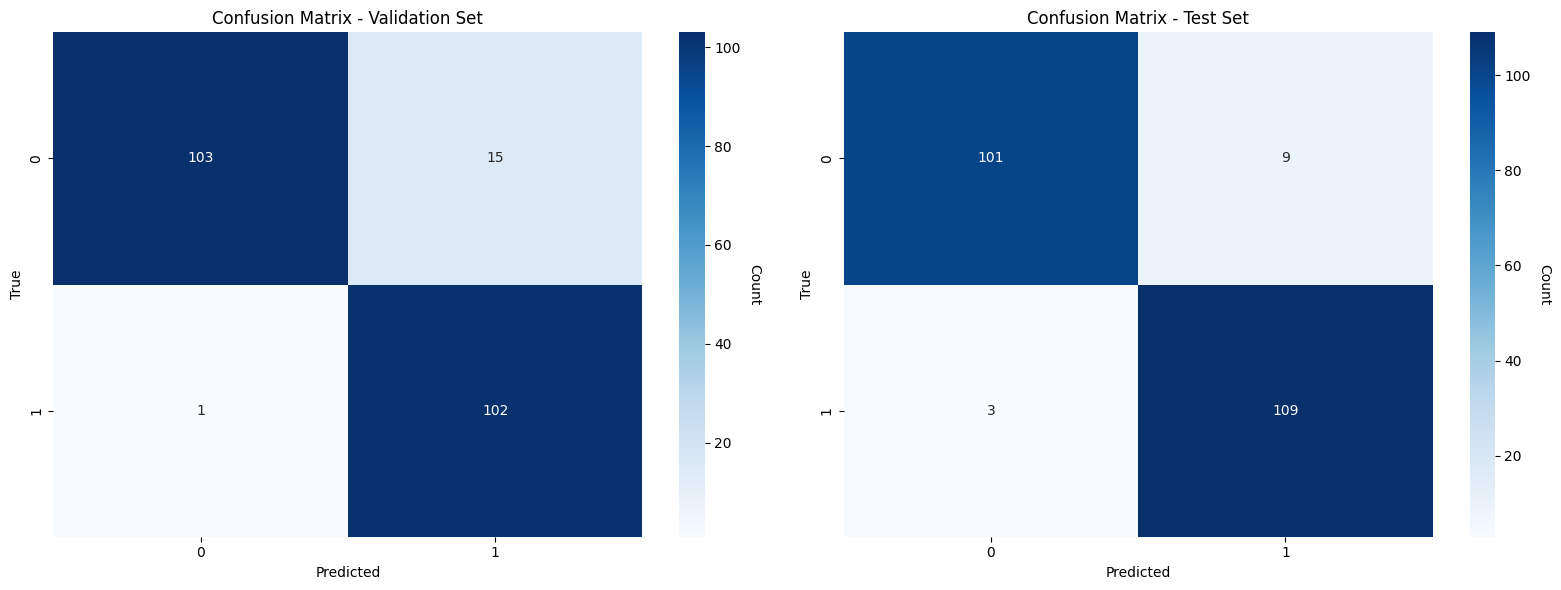

In [185]:
# Tính ma trận nhầm lẫn trên tập kiểm định
conf_matrix_validate = confusion_matrix(y_validate, predictions_on_validation)
# Hiển thị ma trận nhầm lẫn của tập kiểm định bằng heatmap với color bar
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
heatmap_validate = sns.heatmap(conf_matrix_validate, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Set')

# Hiển thị color bar bên phải
cbar_validate= heatmap_validate.collections[0].colorbar
cbar_validate.set_label('Count', rotation=270, labelpad=15)

# Tính ma trận nhầm lẫn trên tập kiểm thử
conf_matrix_test = confusion_matrix(y_test, test_predictions_before_tuning)
# Hiển thị ma trận nhầm lẫn của tập kiểm thử bằng heatmap với color bar
plt.subplot(1, 2, 2)
heatmap_test = sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Hiển thị color bar bên phải
cbar_test = heatmap_test.collections[0].colorbar
cbar_test.set_label('Count', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


In [186]:
# Đánh giá độ chính xác so với cột 'Is_Loyal'
accuracy_with_is_loyal = accuracy_score(y_test, test_predictions_before_tuning)
print(f"Accuracy compared with 'Is_Loyal' column: {accuracy_with_is_loyal}")

# Tính các độ đo khác
precision = precision_score(y_test, test_predictions_before_tuning)
recall = recall_score(y_test, test_predictions_before_tuning)
f1 = f1_score(y_test, test_predictions_before_tuning)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# In classification report
class_report = classification_report(y_test, test_predictions_before_tuning)
print("Classification Report:\n", class_report)

Accuracy compared with 'Is_Loyal' column: 0.9459459459459459
Precision: 0.923728813559322
Recall: 0.9732142857142857
F1 Score: 0.9478260869565216
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.92      0.94       110
        True       0.92      0.97      0.95       112

    accuracy                           0.95       222
   macro avg       0.95      0.95      0.95       222
weighted avg       0.95      0.95      0.95       222



In [187]:
# Đánh giá độ chính xác so với cột 'Is_Loyal'
accuracy_with_is_loyal = accuracy_score(y_validate, predictions_on_validation)
print(f"Accuracy compared with 'Is_Loyal' column on validation set: {accuracy_with_is_loyal}")

# Tính các độ đo khác
precision = precision_score(y_validate, predictions_on_validation)
recall = recall_score(y_validate, predictions_on_validation)
f1 = f1_score(y_validate, predictions_on_validation)

print(f"Precision on validation set: {precision}")
print(f"Recall on validation set: {recall}")
print(f"F1 Score on validation set: {f1}")

# In classification report
class_report = classification_report(y_validate, predictions_on_validation)
print("Classification Report on validation set:\n", class_report)


Accuracy compared with 'Is_Loyal' column on validation set: 0.9276018099547512
Precision on validation set: 0.8717948717948718
Recall on validation set: 0.9902912621359223
F1 Score on validation set: 0.9272727272727274
Classification Report on validation set:
               precision    recall  f1-score   support

       False       0.99      0.87      0.93       118
        True       0.87      0.99      0.93       103

    accuracy                           0.93       221
   macro avg       0.93      0.93      0.93       221
weighted avg       0.94      0.93      0.93       221



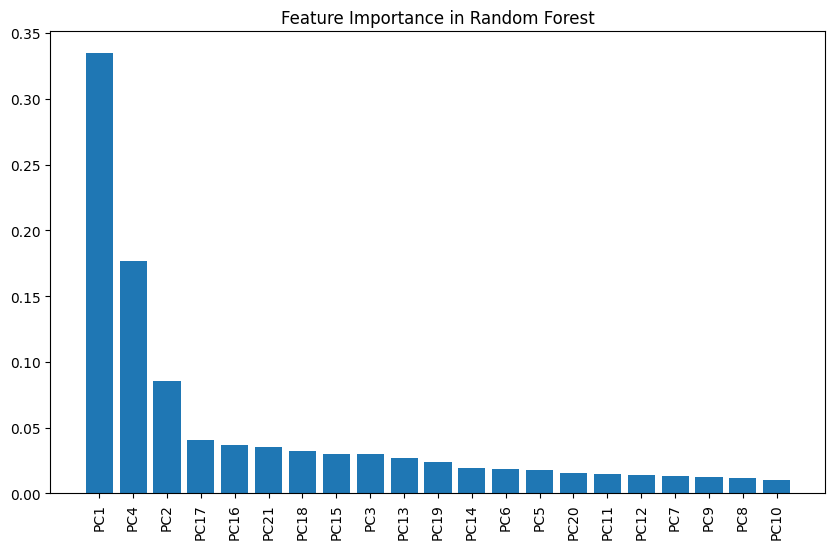

Accuracy compared with 'Is_Loyal' column: 0.9276018099547512
Precision: 0.923728813559322
Recall: 0.9732142857142857
F1 Score: 0.9478260869565216
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.92      0.94       110
        True       0.92      0.97      0.95       112

    accuracy                           0.95       222
   macro avg       0.95      0.95      0.95       222
weighted avg       0.95      0.95      0.95       222



In [188]:
# Lấy độ quan trọng của đặc trưng từ toàn bộ Random Forest
feature_importance = rf_classifier.feature_importances_

# Lấy tên của các đặc trưng
feature_names = X_train.columns

# Sắp xếp độ quan trọng từ cao đến thấp
indices = feature_importances.argsort()[::-1]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importance in Random Forest')
plt.show()

# Đánh giá độ chính xác so với cột 'Is_Loyal'
accuracy_with_is_loyal_new = accuracy_score(y_test, test_predictions_before_tuning)
print(f"Accuracy compared with 'Is_Loyal' column: {accuracy_with_is_loyal}")

# Tính các độ đo khác
precision = precision_score(y_test,test_predictions_before_tuning)
recall = recall_score(y_test, test_predictions_before_tuning)
f1 = f1_score(y_test,  test_predictions_before_tuning)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# In classification report
class_report = classification_report(y_test,  test_predictions_before_tuning)
print("Classification Report:\n", class_report)


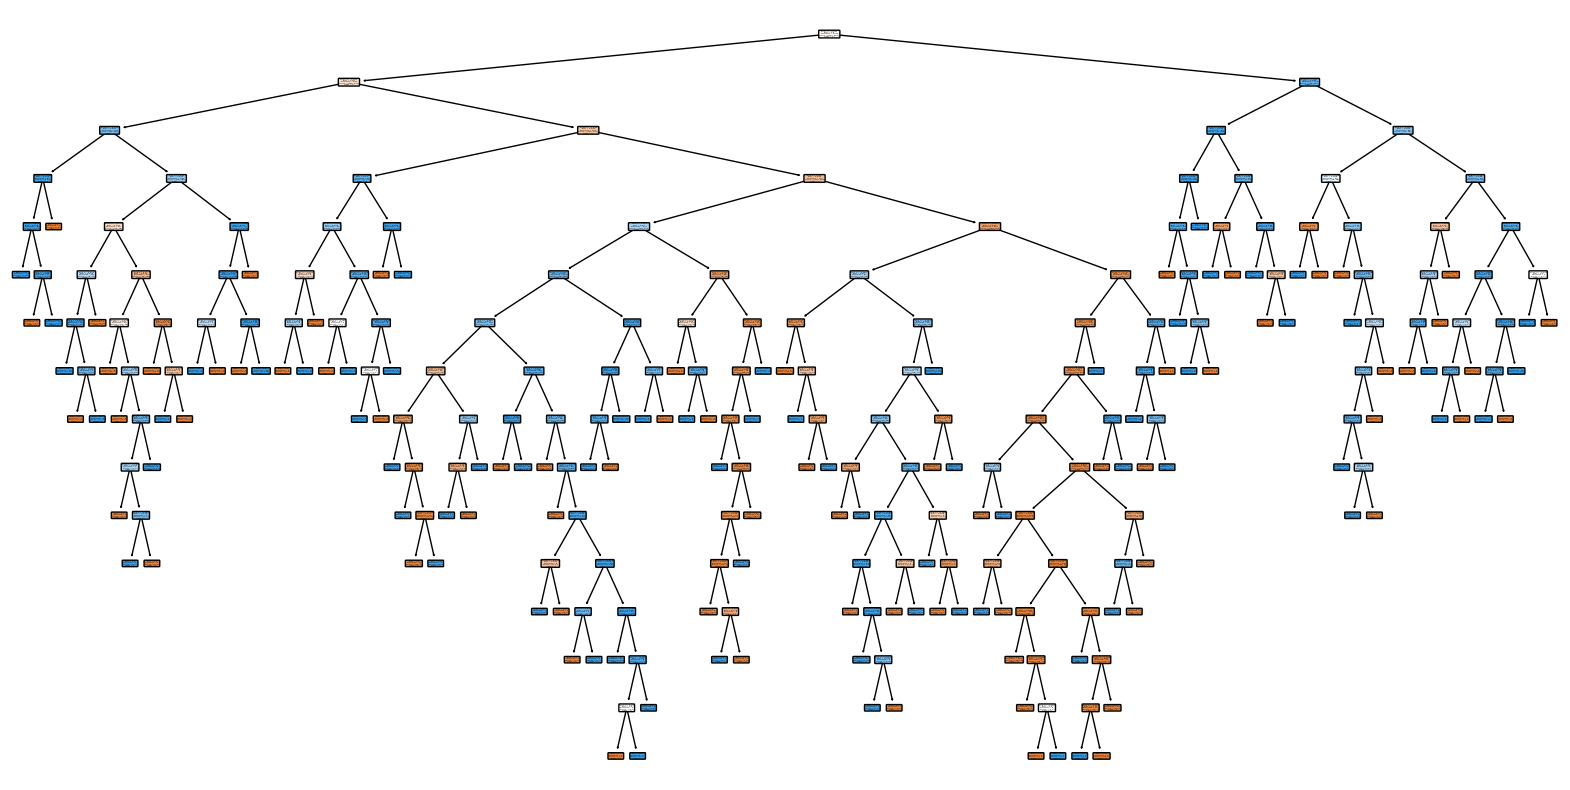

In [190]:
from sklearn.tree import plot_tree

# Lấy ra cây quyết định đầu tiên từ mô hình Random Forest
first_tree = rf_classifier.estimators_[0]

# Vẽ biểu đồ của cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(first_tree, feature_names=feature_names, filled=True, rounded=True, class_names=['0', '1'])
plt.show()

In [191]:
filename = "random_forest_811.pickle"

In [192]:
pickle.dump(rf_classifier, open(filename, "wb"))

In [193]:
rf_811_model = pickle.load(open(filename, "rb"))

7-2-1

In [194]:
# Chia dữ liệu thành tập huấn luyện, tập validation và tập test
X_train_new, X_temp_new, y_train_new, y_temp_new = train_test_split(X, y, test_size=0.3, random_state=42)
X_test_new, X_validate_new, y_test_new, y_validate_new = train_test_split(X_temp_new, y_temp_new, test_size=1/3, random_state=42)

# In ra số lượng dòng của từng tập
print(f"Số lượng dòng tập huấn luyện: {len(X_train_new)}")
print(f"Số lượng dòng tập validation: {len(X_validate_new)}")
print(f"Số lượng dòng tập test: {len(X_test_new)}")


Số lượng dòng tập huấn luyện: 1549
Số lượng dòng tập validation: 222
Số lượng dòng tập test: 442


In [195]:
# Huấn luyện lại mô hình trên toàn bộ tập huấn luyện
rf_classifier_new = RandomForestClassifier(random_state=42)
rf_classifier_new.fit(X_train_new, y_train_new)

RandomForestClassifier(random_state=42)

In [196]:
# Dự đoán trên tập validation để tinh chỉnh tham số
predictions_on_validation_new = rf_classifier_new.predict(X_validate_new)

In [197]:
# Đánh giá độ chính xác trên tập validation
accuracy_on_validation_new = accuracy_score(y_validate_new, predictions_on_validation_new)
print(f"Accuracy on validation set with default parameters: {accuracy_on_validation_new}")


Accuracy on validation set with default parameters: 0.9414414414414415


In [199]:
# # Định nghĩa các giá trị tham số cần tinh chỉnh
# param_grid_new = {
#     'n_estimators': list(range(1, 502, 10)),  # Từ 1 đến 501, mỗi bước nhảy 10
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Tạo đối tượng GridSearchCV
# grid_search_new = GridSearchCV(estimator=rf_classifier_new, param_grid=param_grid_new, cv=5, scoring='accuracy')

# # Tiến hành tìm kiếm trên lưới tham số và huấn luyện lại mô hình trên tập validation
# grid_search_new.fit(X_validate_new, y_validate_new)

# # In ra các tham số tốt nhất
# print("Best parameters:", grid_search_new.best_params_)

In [200]:
# Định nghĩa các giá trị tham số cần tinh chỉnh
#param_grid_new = {
   # 'n_estimators': list(range(1, 502, 10)),  # Từ 1 đến 501, mỗi bước nhảy 10
   # 'max_depth': [None, 10, 20],
  #  'min_samples_split': [2, 5, 10],
  #  'min_samples_leaf': [1, 2, 4]
#}

# Tạo đối tượng GridSearchCV
#grid_search_new = GridSearchCV(estimator=rf_classifier_new, param_grid=param_grid_new, cv=5, scoring='accuracy')

# Tiến hành tìm kiếm trên lưới tham số và huấn luyện lại mô hình trên tập validation
#grid_search_new.fit(X_validate_new, y_validate_new)

# In ra các tham số tốt nhất
#print("Best parameters:", grid_search_new.best_params_)

In [201]:
# Lấy mô hình tốt nhất từ grid search
#best_rf_classifier_new = grid_search_new.best_estimator_


In [202]:
# Đánh giá độ chính xác trên tập test với mô hình đã tinh chỉnh tham số
# test_predictions_after_tuning_new = best_rf_classifier_new.predict(X_test)
#accuracy_on_test_after_tuning_new = accuracy_score(y_test_new, test_predictions_after_tuning_new)
#print(f"Accuracy on test set with best parameters: {accuracy_on_test_after_tuning_new}")

# Đánh giá độ chính xác trên tập test với mô hình chưa tinh chỉnh tham số
test_predictions_before_tuning_new = rf_classifier_new.predict(X_test_new)
accuracy_on_test_before_tuning_new = accuracy_score(y_test_new, test_predictions_before_tuning_new)
print(f"Accuracy on test set with default parameters: {accuracy_on_test_before_tuning_new}")

Accuracy on test set with default parameters: 0.9411764705882353


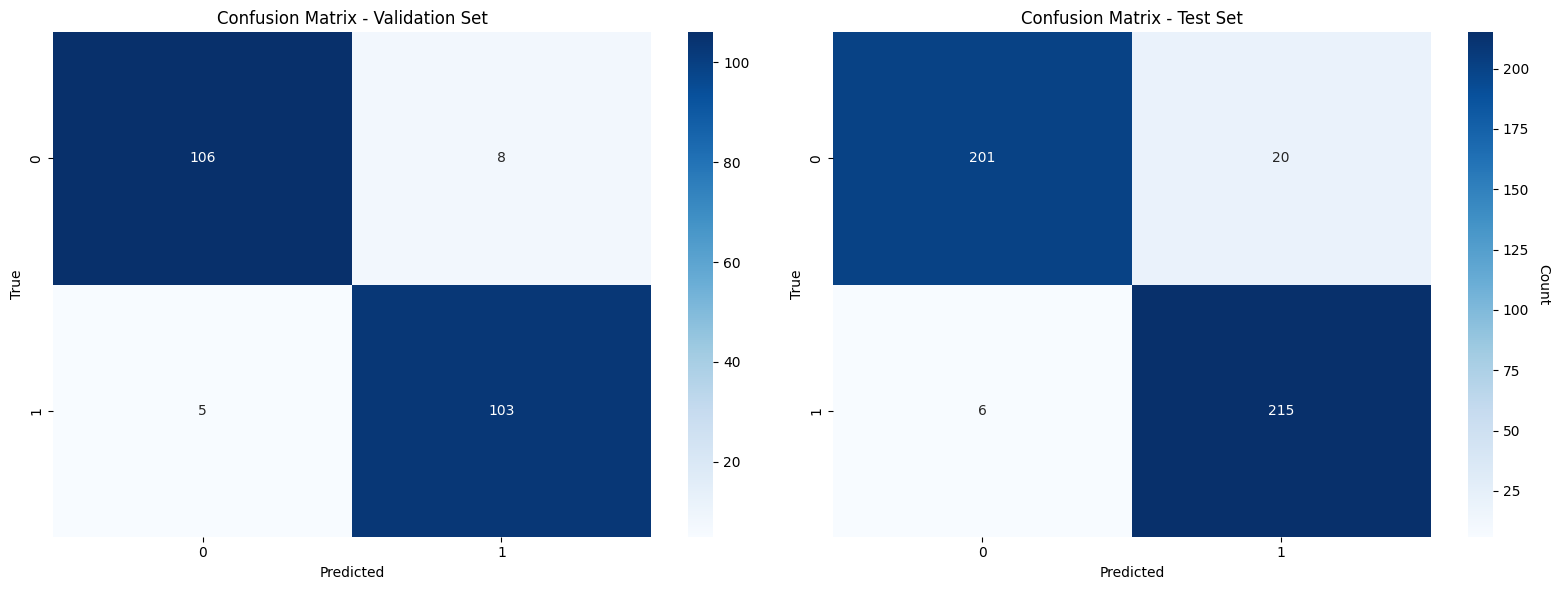

In [203]:
# Tính ma trận nhầm lẫn trên tập kiểm định
conf_matrix_validate_new = confusion_matrix(y_validate_new, predictions_on_validation_new)
# Hiển thị ma trận nhầm lẫn của tập kiểm định bằng heatmap với color bar
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
heatmap_validate_new = sns.heatmap(conf_matrix_validate_new, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Set')

# Hiển thị color bar bên phải
cbar_validate_new= heatmap_validate.collections[0].colorbar
cbar_validate_new.set_label('Count', rotation=270, labelpad=15)

# Tính ma trận nhầm lẫn trên tập kiểm thử
conf_matrix_test_new = confusion_matrix(y_test_new, test_predictions_before_tuning_new)
# Hiển thị ma trận nhầm lẫn của tập kiểm thử bằng heatmap với color bar
plt.subplot(1, 2, 2)
heatmap_test_new = sns.heatmap(conf_matrix_test_new, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Hiển thị color bar bên phải
cbar_test_new = heatmap_test_new.collections[0].colorbar
cbar_test_new.set_label('Count', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


In [204]:
# Đánh giá độ chính xác so với cột 'Is_Loyal'
accuracy_with_is_loyal_new = accuracy_score(y_test_new, test_predictions_before_tuning_new)
print(f"Accuracy compared with 'Is_Loyal' column: {accuracy_with_is_loyal_new}")

# Tính các độ đo khác
precision_new = precision_score(y_test_new, test_predictions_before_tuning_new)
recall_new = recall_score(y_test_new, test_predictions_before_tuning_new)
f1_new = f1_score(y_test_new, test_predictions_before_tuning_new)

print(f"Precision: {precision_new}")
print(f"Recall: {recall_new}")
print(f"F1 Score: {f1_new}")

# In classification report
class_report_new = classification_report(y_test_new, test_predictions_before_tuning_new)
print("Classification Report:\n", class_report_new)

Accuracy compared with 'Is_Loyal' column: 0.9411764705882353
Precision: 0.9148936170212766
Recall: 0.9728506787330317
F1 Score: 0.9429824561403508
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.91      0.94       221
        True       0.91      0.97      0.94       221

    accuracy                           0.94       442
   macro avg       0.94      0.94      0.94       442
weighted avg       0.94      0.94      0.94       442



In [205]:
# Đánh giá độ chính xác so với cột 'Is_Loyal'
accuracy_with_is_loyal_new = accuracy_score(y_validate_new, predictions_on_validation_new)
print(f"Accuracy compared with 'Is_Loyal' column on validation set: {accuracy_with_is_loyal_new}")

# Tính các độ đo khác
precision_new = precision_score(y_validate_new, predictions_on_validation_new)
recal_new = recall_score(y_validate_new, predictions_on_validation_new)
f1_new = f1_score(y_validate_new, predictions_on_validation_new)

print(f"Precision on validation set: {precision_new}")
print(f"Recall on validation set: {recall_new}")
print(f"F1 Score on validation set: {f1_new}")

# In classification report
class_report_new = classification_report(y_validate_new, predictions_on_validation_new)
print("Classification Report on validation set:\n", class_report_new)


Accuracy compared with 'Is_Loyal' column on validation set: 0.9414414414414415
Precision on validation set: 0.9279279279279279
Recall on validation set: 0.9728506787330317
F1 Score on validation set: 0.9406392694063928
Classification Report on validation set:
               precision    recall  f1-score   support

       False       0.95      0.93      0.94       114
        True       0.93      0.95      0.94       108

    accuracy                           0.94       222
   macro avg       0.94      0.94      0.94       222
weighted avg       0.94      0.94      0.94       222



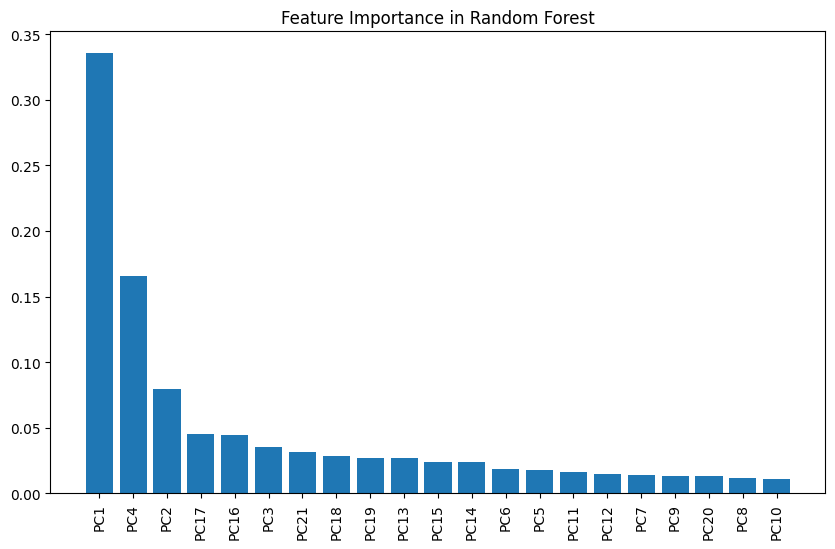

Accuracy compared with 'Is_Loyal' column: 0.9411764705882353
Precision: 0.9148936170212766
Recall: 0.9728506787330317
F1 Score: 0.9429824561403508
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.91      0.94       221
        True       0.91      0.97      0.94       221

    accuracy                           0.94       442
   macro avg       0.94      0.94      0.94       442
weighted avg       0.94      0.94      0.94       442



In [206]:
# Lấy độ quan trọng của đặc trưng từ toàn bộ Random Forest
feature_importances_new = rf_classifier_new.feature_importances_

# Lấy tên của các đặc trưng
feature_names_new = X_train_new.columns

# Sắp xếp độ quan trọng từ cao đến thấp
indices_new = feature_importances_new.argsort()[::-1]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_new.shape[1]), feature_importances_new[indices_new])
plt.xticks(range(X_train_new.shape[1]), feature_names_new[indices_new], rotation=90)
plt.title('Feature Importance in Random Forest')
plt.show()

# Đánh giá độ chính xác so với cột 'Is_Loyal'
accuracy_with_is_loyal_new = accuracy_score(y_test_new, test_predictions_before_tuning_new)
print(f"Accuracy compared with 'Is_Loyal' column: {accuracy_with_is_loyal_new}")

# Tính các độ đo khác
precision_new = precision_score(y_test_new,test_predictions_before_tuning_new)
recall_new = recall_score(y_test_new, test_predictions_before_tuning_new)
f1_new = f1_score(y_test_new,  test_predictions_before_tuning_new)

print(f"Precision: {precision_new}")
print(f"Recall: {recall_new}")
print(f"F1 Score: {f1_new}")

# In classification report
class_report_new = classification_report(y_test_new,  test_predictions_before_tuning_new)
print("Classification Report:\n", class_report_new)


In [208]:
# from sklearn.tree import plot_tree

# # Lấy ra cây quyết định đầu tiên từ mô hình Random Forest
# first_tree_new = grid_search_new.best_estimator_.estimators_[0]

# # Vẽ biểu đồ của cây quyết định
# plt.figure(figsize=(20, 10))
# plot_tree(first_tree_new, feature_names=feature_names_new, filled=True, rounded=True, class_names=['0', '1'])
# plt.show()


In [209]:
filename2 = "random_forest_721.pickle"

In [210]:
pickle.dump(rf_classifier_new, open(filename2, "wb"))

In [211]:
rf_721_model = pickle.load(open(filename2, "rb"))